# **FASE DE ANÁLISIS DEL PROBLEMA**
- Definición concreta del problema y objetivos.
- Descripción y justificación de las técnicas que se utilizarán
para el trabajo.

# ---------------------- X ----------------------

# **FASE DE PRE-PROCESAMIENTO DE LOS DATOS**
- Análisis exploratorio de los datos (univariante y multivariante)
- Proceso de limpieza de datos.
- Especificación de las vistas minables.

Importamos los paquetes y archivos necesarios para el proyecto.

In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

path = "data/"

#importamos el archivo csv
data = pd.read_csv(path + "clientes.csv", sep=',', encoding='utf-8')

Eliminamos las columnas que creemos irrelevantes para el análisis de los datos, que estorbarían a la hora de crear el modelo de predicción.
Además, definimos el arreglo de columnas a utilizar.

In [116]:
data_filt = data.drop(columns=['IdCliente', 'IdCiudad', 'Nombre', 'Apellido', 'FechaNacimiento', 'Email', 'Direccion', 'Telefono'])

columnas = data_filt.columns

Con el método .head() previsualizamos los primeros datos de nuestro DataFrame

In [117]:
data_filt.head()

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,FechaPrimeraCompra,Distancia,Region,Edad,ComproBicicleta
0,S,M,10000.0,4,'Educación secundaria (en curso)',Obrero,1,1,13/05/2008,'0-1 Km.',Centro,46,1
1,S,M,70000.0,1,'Estudios universitarios (en curso)','Obrero especializado',0,1,03/11/2007,'0-1 Km.',Sur,55,1
2,C,F,40000.0,1,Licenciatura,'Obrero especializado',1,1,05/11/2006,'0-1 Km.',Centro,39,1
3,C,M,60000.0,3,'Estudios de postgrado',Gestión,1,2,02/05/2008,'10+ Km.',Norte,74,0
4,S,F,60000.0,0,'Estudios universitarios (en curso)','Obrero especializado',0,2,04/11/2007,'1-2 Km.',Norte,36,0


### **ANALISIS UNIVARIANTE**

#### **_Describe ()_**

Con el método .describe() se muestran estadísticas para todas las columnas del DataFrame, tanto numéricas como no numéricas. Es útil para obtener una visión general completa del DataFrame.

In [118]:
data_filt.describe(include='all').fillna('-').rename(index={'count': 'Cantidad', 'unique': 'Valores únicos',
                                'top': 'Valor más frecuente', 'freq': 'Frecuencia',
                                'mean': 'Media', 'std': 'Desviación estándar',
                                'min': 'Mínimo', '25%': 'Primer cuartil',
                                '50%': 'Mediana', '75%': 'Tercer cuartil',
                                'max': 'Máximo'})

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,FechaPrimeraCompra,Distancia,Region,Edad,ComproBicicleta
Cantidad,6400,6400,6390.0,6400.0,6400,6400,6400.0,6400.0,6400,6400,6400,6400.0,6400.0
Valores únicos,3,2,-,-,5,5,-,-,1028,5,4,-,-
Valor más frecuente,C,M,-,-,Licenciatura,Profesional,-,-,19/08/2007,'0-1 Km.',Norte,-,-
Frecuencia,3504,3223,-,-,1800,1946,-,-,27,2166,3310,-,-
Media,-,-,57532.081377,1.894844,-,-,0.676562,1.547656,-,-,-,51.195469,0.394375
Desviación estándar,-,-,32331.969091,1.630993,-,-,0.467825,1.14706,-,-,-,11.517698,0.488754
Mínimo,-,-,10000.0,0.0,-,-,0.0,0.0,-,-,-,32.0,0.0
Primer cuartil,-,-,30000.0,0.0,-,-,0.0,1.0,-,-,-,42.0,0.0
Mediana,-,-,60000.0,2.0,-,-,1.0,2.0,-,-,-,49.0,0.0
Tercer cuartil,-,-,70000.0,3.0,-,-,1.0,2.0,-,-,-,59.0,1.0


Analizamos los primeros parámetros importantes y nos parecio importante destacar lo siguiente: 

- Como primer punto importante determinamos que la cantidad de clientes en la lista es de 6400, de los cuales existen 10 de esos clientes que no se tiene información sobre sus ingresos anuales. 

- Otro resultado que nos llamó la atención fue que existe al menos un ingreso anual máximo de $170.000 lo cual es aproximadamente 3 veces el promedio, y cuyo tercer cuartil ronda los $70.000. Debemos tenerlo en cuenta para analizar si se trata de un valor aislado, o si se repite en mas de una ocación, para determinar si se estamos frente a un outlier o no.

- Además, podemos observar que los rangos de las variables varían significativamente, por lo que antes de pasar a la modelización es necesario estandarizar las variables.

#### **_Info ()_**

Utilizamos el metodo de .Info() para conocer cuantas variables nulas hay en nuestro dataframe

In [119]:
data_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EstadoCivil         6400 non-null   object 
 1   Genero              6400 non-null   object 
 2   IngresoAnual        6390 non-null   float64
 3   TotalHijos          6400 non-null   int64  
 4   Educacion           6400 non-null   object 
 5   Ocupacion           6400 non-null   object 
 6   Propietario         6400 non-null   int64  
 7   CantAutomoviles     6400 non-null   int64  
 8   FechaPrimeraCompra  6400 non-null   object 
 9   Distancia           6400 non-null   object 
 10  Region              6400 non-null   object 
 11  Edad                6400 non-null   int64  
 12  ComproBicicleta     6400 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 650.1+ KB


Confirmamos que existen 10 datos de ingresos anuales que son nulos, por lo tanto debemos tenerlos en cuenta y decidir que hacer con esos valores.

#### **_Varianza y Desvio estandar_**

Calculamos las varianza y el desvío con redondeo a 4 decimales y 
luego, convertimos los resultados a cadenas de texto con formato personalizado y los mostramos por consola.

In [120]:
varianza = data_filt.var(numeric_only=True).round(4)
desvio = data_filt.std(numeric_only=True).round(4)

varianza_str = varianza.apply(lambda x: f"{x:.4f}").to_string()
desvio_str = desvio.apply(lambda x: f"{x:.4f}").to_string()

print("\n----------Varianza----------")
print(varianza_str)
print("\n----------Desvío estándar----------")
print(desvio_str)


----------Varianza----------
IngresoAnual       1045356225.2806
TotalHijos                  2.6601
Propietario                 0.2189
CantAutomoviles             1.3157
Edad                      132.6574
ComproBicicleta             0.2389

----------Desvío estándar----------
IngresoAnual       32331.9691
TotalHijos             1.6310
Propietario            0.4678
CantAutomoviles        1.1471
Edad                  11.5177
ComproBicicleta        0.4888


Analizando los resultados y ayudándonos además con las medidas analizadas anteriormente concluimos que los valores de los ingresos anuales se encuentran muy dispersos, y que su rango es muy amplio. Como vimos en el punto anterior los ingresos anuales varían desde $10.000 hasta $170.000. 

De las demás columnas no encontramos ningún dato significativo para analizar más a fondo. 


#### **_Shape_**

Mostramos la cantidad de filas y columnas del DataFrame.

In [121]:
data_filt.shape

(6400, 13)

#### **_Frecuencia absoluta y relativa_**

Recorremos el arreglo de columnas y calculamos las frecuencias absoluta y relativa de cada variable para mostrarlas por consola 

In [122]:
for col in columnas:
    if (col != "FechaPrimeraCompra"):
        # Calcular frecuencia y frecuencia relativa de valores en la columna
        frecuencia = data_filt[col].value_counts()
        frecuencia_rel = data_filt[col].value_counts(normalize = True) * 100
        
        # Convertir resultado a cadena de texto con formato personalizado
        frecuencia_rel_str = (frecuencia_rel.round(2).apply(lambda x: str(x) + '%').to_string(float_format='%.2f'))
        
        # Mostrar resultados por consola
        print("\n\n----------" + col + "----------")
        print("Frecuencia:", frecuencia)
        print("\nFrecuencia relativa:", frecuencia_rel_str)



----------EstadoCivil----------
Frecuencia: EstadoCivil
C    3504
S    2894
V       2
Name: count, dtype: int64

Frecuencia relativa: EstadoCivil
C    54.75%
S    45.22%
V     0.03%


----------Genero----------
Frecuencia: Genero
M    3223
F    3177
Name: count, dtype: int64

Frecuencia relativa: Genero
M    50.36%
F    49.64%


----------IngresoAnual----------
Frecuencia: IngresoAnual
60000.0     1088
40000.0      888
70000.0      827
30000.0      797
20000.0      612
80000.0      485
10000.0      409
90000.0      278
50000.0      228
100000.0     200
130000.0     200
110000.0     180
120000.0      98
150000.0      39
170000.0      31
160000.0      30
Name: count, dtype: int64

Frecuencia relativa: IngresoAnual
60000.0     17.03%
40000.0      13.9%
70000.0     12.94%
30000.0     12.47%
20000.0      9.58%
80000.0      7.59%
10000.0       6.4%
90000.0      4.35%
50000.0      3.57%
100000.0     3.13%
130000.0     3.13%
110000.0     2.82%
120000.0     1.53%
150000.0     0.61%
170000.0  

Con respecto al valor máximo del ingreso anual ($170.000)  que nos había llamado la atención, pudimos determinar que existen 31 personas que ganan ese sueldo. Debemos seguir analizando para determinar si se trata o no de un outlier. 


#### **_Histogramas y Boxplots_**

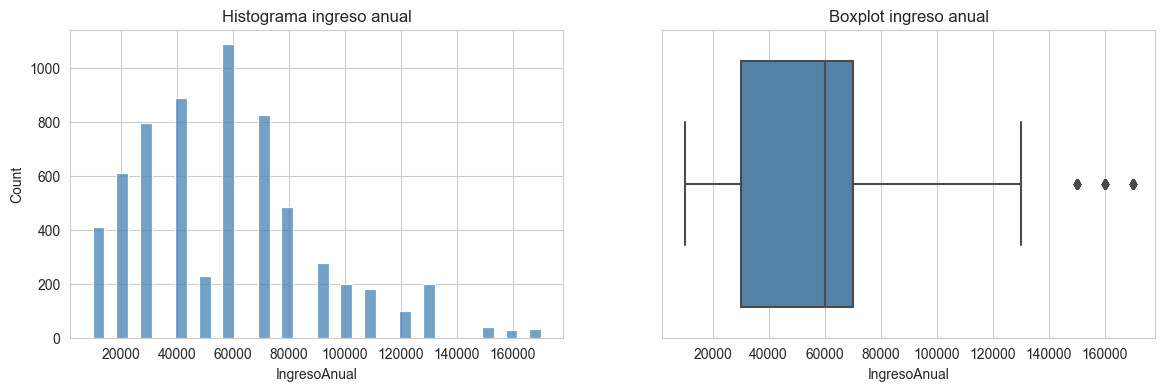

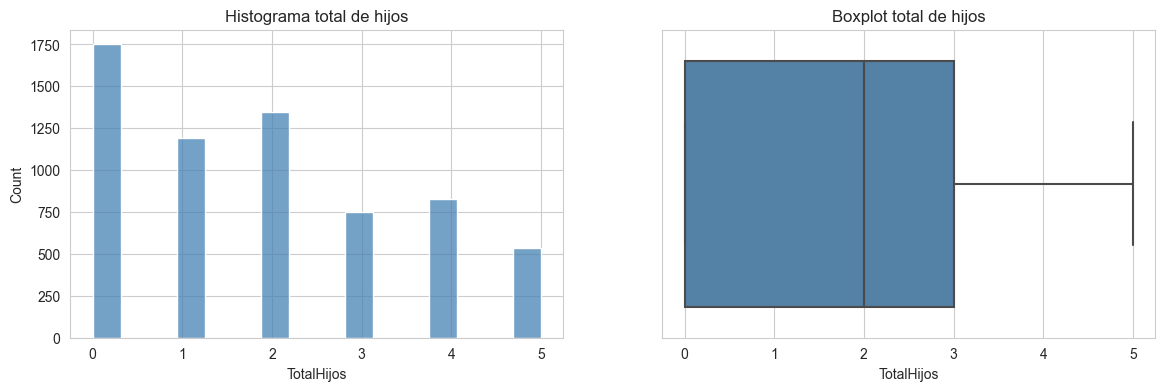

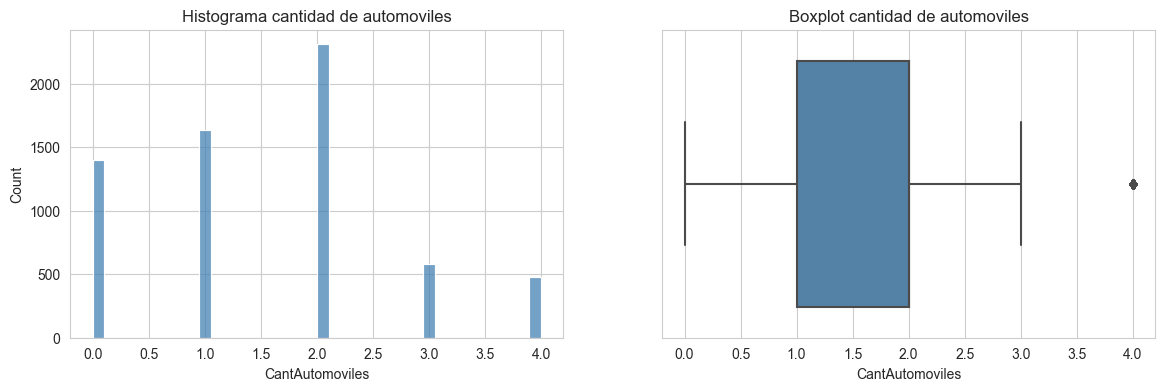

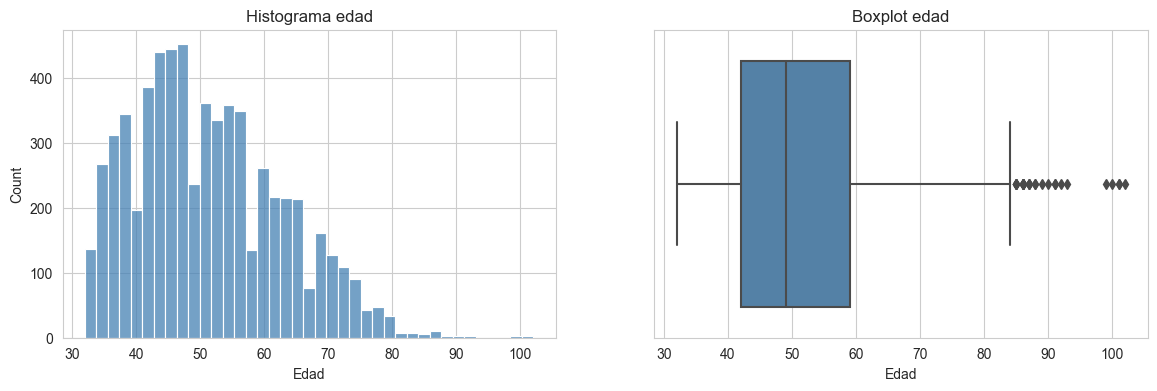

In [123]:
sns.set_style("whitegrid")

# Crear una figura con dos subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Crear un histograma de la variable "Ingreso Anual" en el primer subplot
sns.histplot(data=data, x="IngresoAnual", ax=ax[0], color="steelblue")
# Agregar un título al primer subplot
ax[0].title.set_text("Histograma ingreso anual")
# Crear un boxplot de la variable "Ingreso Anual" en el segundo subplot
sns.boxplot(data=data, x="IngresoAnual", ax=ax[1], color="steelblue")
# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot ingreso anual")
# Mostrar la figura completa
plt.show()


# Crear una figura con dos subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Crear un histograma de la variable "TotalHijos" en el primer subplot
sns.histplot(data=data, x="TotalHijos", ax=ax[0], color="steelblue")
# Agregar un título al primer subplot
ax[0].title.set_text("Histograma total de hijos")
# Crear un boxplot de la variable "TotalHijos" en el segundo subplot
sns.boxplot(data=data, x="TotalHijos", ax=ax[1], color="steelblue")
# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot total de hijos")
# Mostrar la figura completa
plt.show()


# Crear una figura con dos subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Crear un histograma de la variable "CantAutomoviles" en el primer subplot
sns.histplot(data=data, x="CantAutomoviles", ax=ax[0], color="steelblue")
# Agregar un título al primer subplot
ax[0].title.set_text("Histograma cantidad de automoviles")
# Crear un boxplot de la variable "CantAutomoviles" en el segundo subplot
sns.boxplot(data=data, x="CantAutomoviles", ax=ax[1], color="steelblue")
# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot cantidad de automoviles")
# Mostrar la figura completa
plt.show()

# Crear una figura con dos subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Crear un histograma de la variable "Edad" en el primer subplot
sns.histplot(data=data, x="Edad", ax=ax[0], color="steelblue")
# Agregar un título al primer subplot
ax[0].title.set_text("Histograma edad")
# Crear un boxplot de la variable "Edad" en el segundo subplot
sns.boxplot(data=data, x="Edad", ax=ax[1], color="steelblue")
# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot edad")
# Mostrar la figura completa
plt.show()

##### ANÁLISIS DE HISTOGRAMAS Y BOXPLOTS

##### Ingreso Anual:
La mayor parte de los clientes tienen ingresos anuales entre 30 mil y 70 mil. La variable esta sesgada a la izquierda. 
En el gráfico de boxplot del Ingreso anual se observan 3 valores que están  fuera del intervalo al ser más grandes que el bigote del máximo (3er cuartil +1.5RIQ). Si bien son valores atípicos pueden ser solo personas con un ingreso anual bastante mayor a la media pero no de forma excesiva. 

##### Hijos: 
Se puede notar que  gran parte de los clientes no tiene hijos, información importante  ya que la marca ofrece bicicletas para niños y se puede evitar enviarles publicidad de este tipo. Todos los valores están dentro de los intervalos del boxplot, todos los clientes tienen entre 0 y 5 hijos.

##### Cantidad de Automóviles:  
Tanto el boxplot como el histograma nos muestran que la media de la cantidad de automoviles es de 2. Como pudimos ver anteriormente utilizando el metodo describe(), podemos confirmar que la mediana coincide con el tercer cuartil y es por eso que no se dibuja una linea dentro del rectangulo. Pudimos notar también que existe un valor anomalo en 4.0.   

##### Edad: 
Analizando el histograma de la edad podemos notar que la variable tiene una distribucion normal sesgada a la izquierda y posee unos valores entre 80 y 100 que se alejan de la media y cuya frecuencia es baja. Ahora apoyándonos en el diagrama de boxplot de la variable edad podemos notar que existen algunos valores que está fuera del máximo que está calculado mediante Q3 + 1.5RIQ. Esto nos puede decir que estamos frente a valores anomalos (outliers) que quizas debamos modificar o retirar. Más adelante en la etapa final del análisis exploratorio decidiremos acerca de estos valores. También notamos que el rectangulo es medianamente corto y ancho por lo que nos da una idea de la dispersion de los datos. 


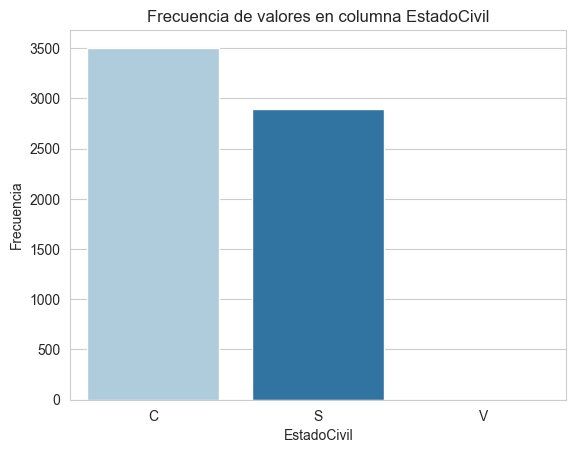

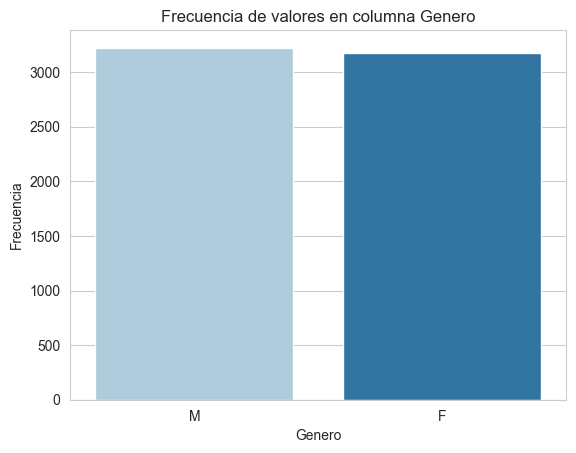

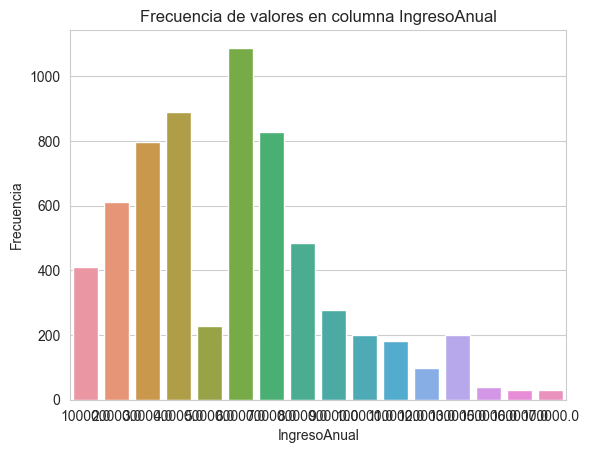

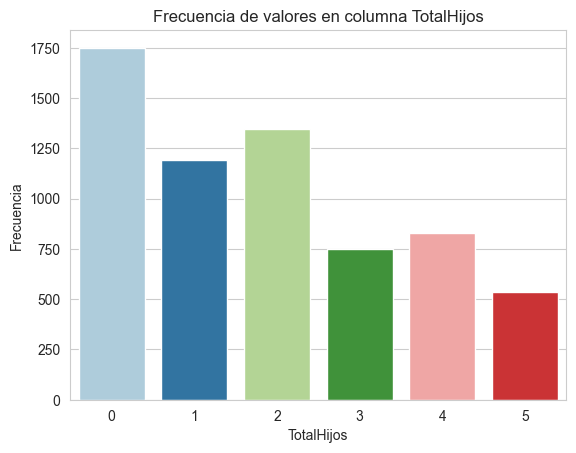

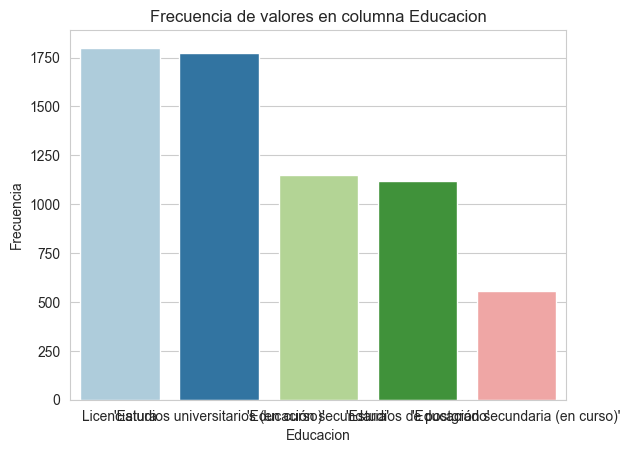

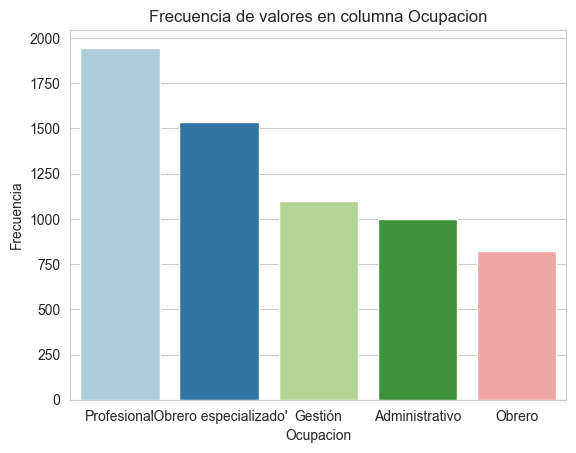

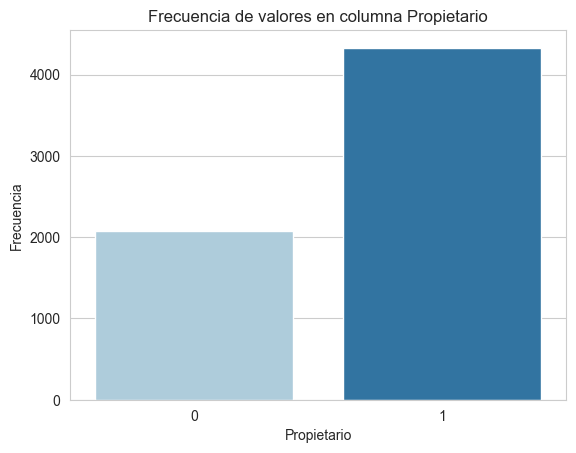

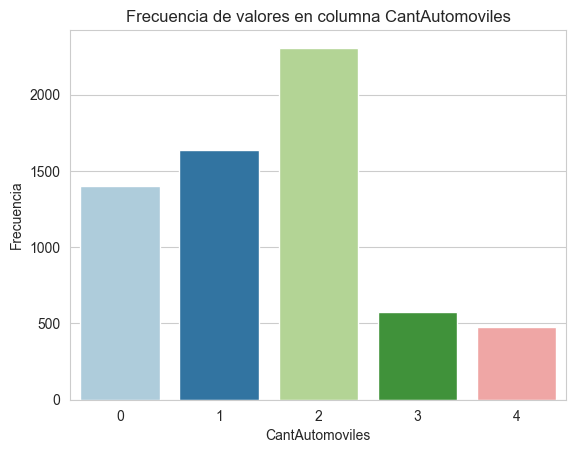

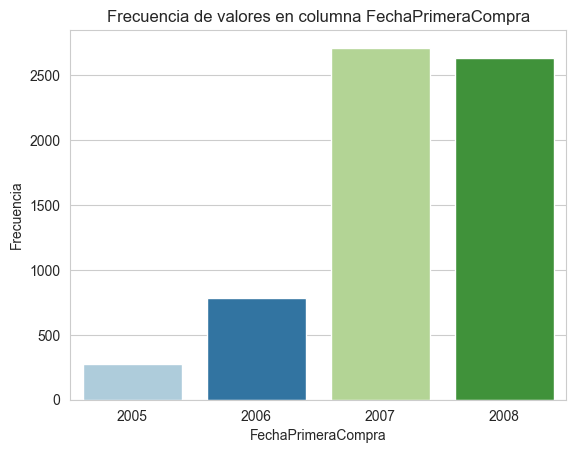

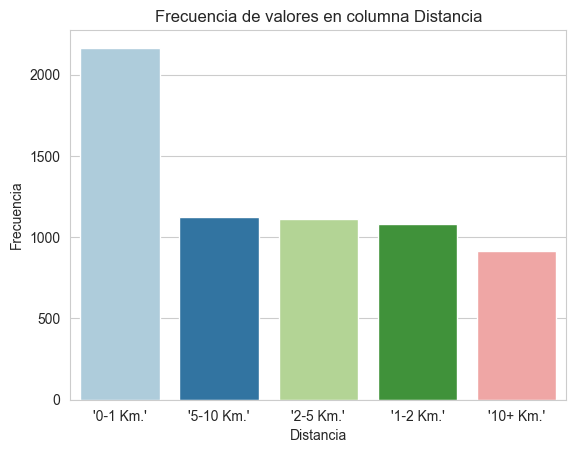

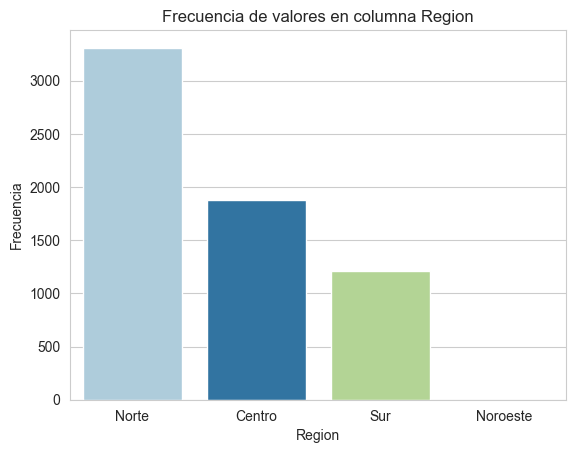

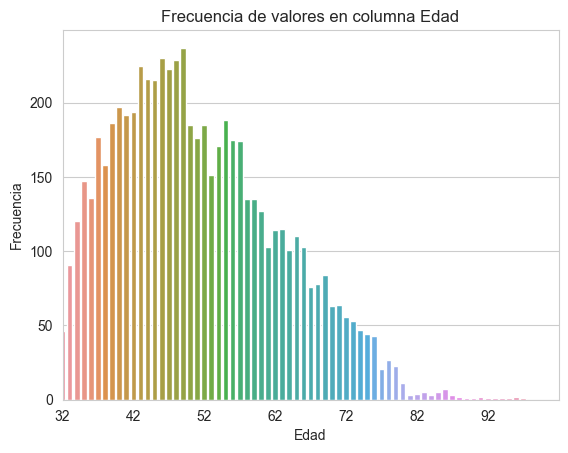

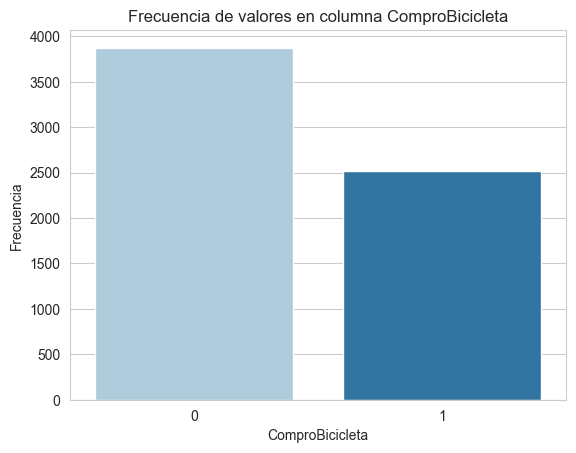

In [124]:
for col in columnas:
    if col == 'FechaPrimeraCompra':
        # Agrupar valores por mes
        data_filt['FechaPrimeraCompra'] = pd.to_datetime(data_filt['FechaPrimeraCompra'], dayfirst=True)
        data_filt['FechaPrimeraCompra'] = data_filt['FechaPrimeraCompra'].dt.to_period('Y')
        frecuencia = data_filt[col].value_counts().sort_index(ascending=True)
    else:
        # Calcular frecuencia y frecuencia relativa de valores en la columna
        frecuencia = data_filt[col].value_counts()

    frecuencia_rel = data_filt[col].value_counts(normalize=True) * 100
    
    # Convertir resultado a cadena de texto con formato personalizado
    frecuencia_rel_str = (frecuencia_rel.round(2).apply(lambda x: str(x) + '%').to_string(float_format='%.2f'))
    
    # Crear gráfico de barras
    plt.figure()
    sns.barplot(x=frecuencia.index, y=frecuencia.values)

    plt.title("Frecuencia de valores en columna " + col)
    plt.xlabel(col)
    if col == 'Edad':
        plt.xticks(np.arange(0, 140, 10))
        plt.xlim(0, 70)
    plt.ylabel("Frecuencia")
    
    # Mostrar el gráfico
    plt.show()

### **ANÁLISIS MULTIVARIANTE**

#### Matriz S

La matriz de correlación se representa como un dataframe cuadrado, donde las filas y columnas corresponden a las variables númericas de data, y los valores en cada celda indican el coeficiente de correlacion entre la fila y la columna correspondientes.
La diagonal principal de la matriz siempre va a tener un valor de 1, ya que una variable esta perfectamente correlacionada consigo misma.

Para poder obtener esta matriz S, hacemos uso de data.corr() que calcula la matriz de correlacion entre todas las vairables numericas del dataframe data. Esta misma muestra la relacion lineal entre cada par de variables, donde un valor cercano a 1 indica una correlación positiva fuerte 
(es decir, que ambas variables tienden a aumentar o disminuir juntas), un valor cercano a 
-1 indica una correlación negativa fuerte (es decir, que cuando una variable aumenta, 
la otra tiende a disminuir) y un valor cercano a 0 indica que no hay una correlación lineal significativa entre las variables.

In [125]:
data_filt.select_dtypes(include=[np.number]).corr().round(2)

,IngresoAnual,TotalHijos,Propietario,CantAutomoviles,Edad,ComproBicicleta
IngresoAnual,1.00,0.22,0.04,0.47,0.15,0.05
TotalHijos,0.22,1.00,0.19,0.27,0.50,-0.13
Propietario,0.04,0.19,1.00,-0.05,0.11,0.02
CantAutomoviles,0.47,0.27,-0.05,1.00,0.17,-0.18
Edad,0.15,0.50,0.11,0.17,1.00,-0.10
ComproBicicleta,0.05,-0.13,0.02,-0.18,-0.10,1.00


Analizando la matriz S podemos notar que las variables que están más relacionadas entre sí son las variables de IngresoAnual con CantAutomoviles y TotalHijos con Edad. Ambas se relacion directamente, es decir, que a mayor ingreso encontramos mayor cantidad de automoviles y a menor edad, menor cantidad de hijos.
Esto nos sirve para prestar atención a los scatterplots (Diagrama de dispersión) y a los boxplots estratificado de esos pares de variables y poder determinar de qué manera están relacionadas. Otro dato que nos llamó la atención es que las variables CantAutomoviles y ComproBicicleta están relacionadas inversamente. Si bien su valor con respecto a la relación no es alto ni muy llamativo, es bueno tener en cuenta que se relaciona inversamente y por eso su número en la matriz es negativo. 


#### Matriz R

In [126]:
data_filt.select_dtypes(include=[np.number]).cov().round(2)

,IngresoAnual,TotalHijos,Propietario,CantAutomoviles,Edad,ComproBicicleta
IngresoAnual,1.045356e+09,11725.86,675.59,17394.78,57017.47,854.85
TotalHijos,1.172586e+04,2.66,0.14,0.51,9.31,-0.10
Propietario,6.755900e+02,0.14,0.22,-0.03,0.60,0.00
CantAutomoviles,1.739478e+04,0.51,-0.03,1.32,2.25,-0.10
Edad,5.701747e+04,9.31,0.60,2.25,132.66,-0.57
ComproBicicleta,8.548500e+02,-0.10,0.00,-0.10,-0.57,0.24


Cuando vemos la Matriz R nos damos cuenta que no nos sirve hacer Matriz R ni analizarla porque no coinciden las unidades de las distintas variables

### Diagramas de dispersión

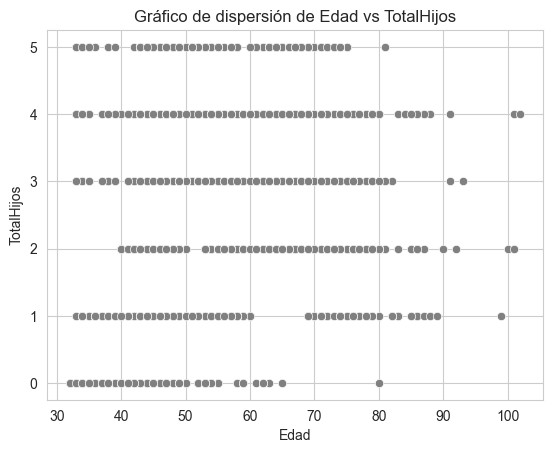

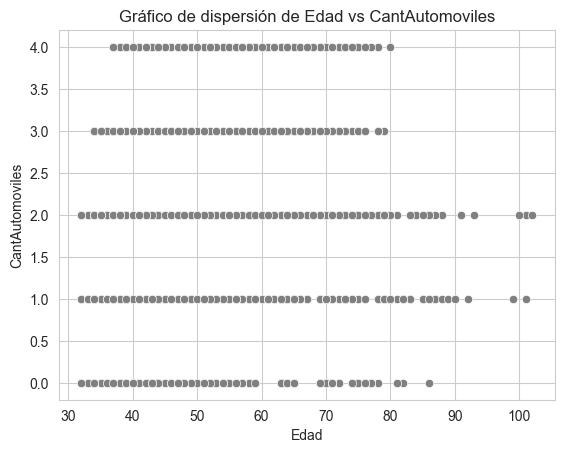

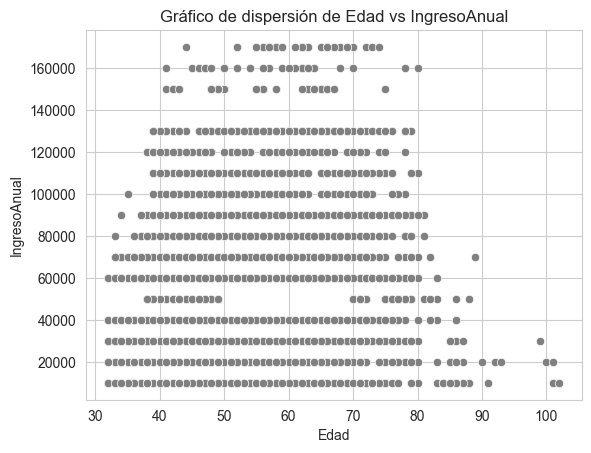

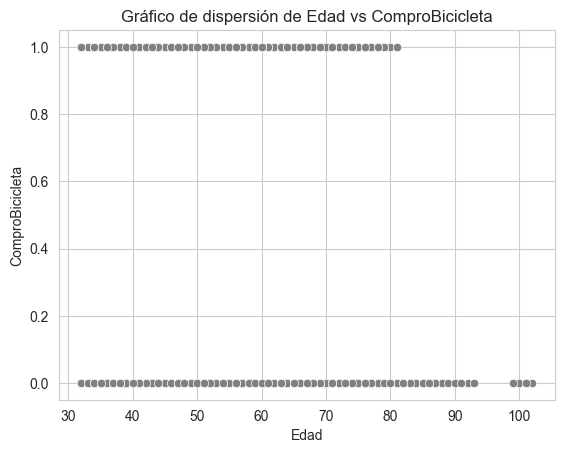

In [127]:
cols_to_analyze = ['Edad', 'TotalHijos', 'CantAutomoviles', 'IngresoAnual', 'ComproBicicleta']

for col in cols_to_analyze:
    if col != "Edad":
        # Crear el gráfico de dispersión
        sns.scatterplot(data=data_filt, x="Edad", y=col, color="grey")
        
        # Agregar título al gráfico
        plt.title("Gráfico de dispersión de Edad vs " + col)
        # Mostrar el gráfico
        plt.show()

#### Boxplots estratificados

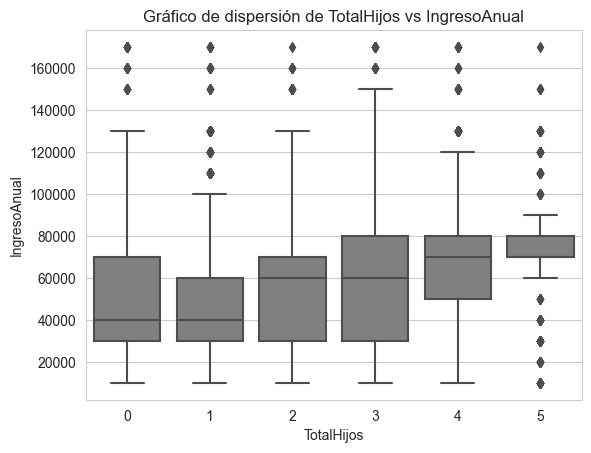

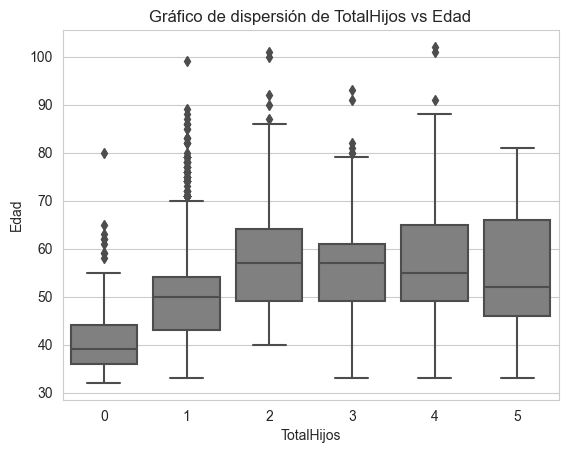

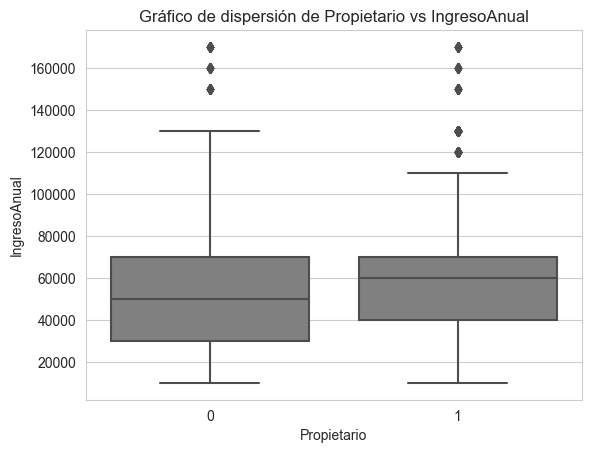

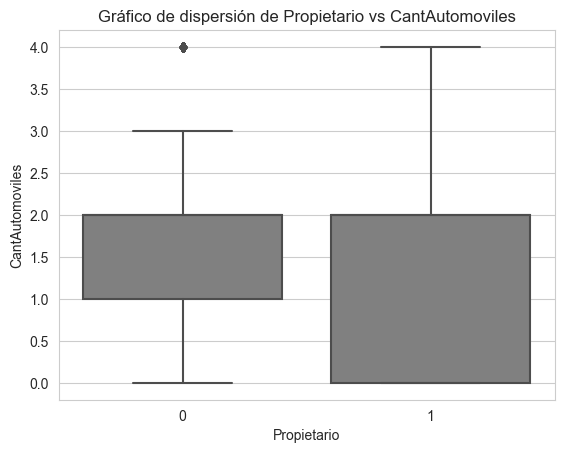

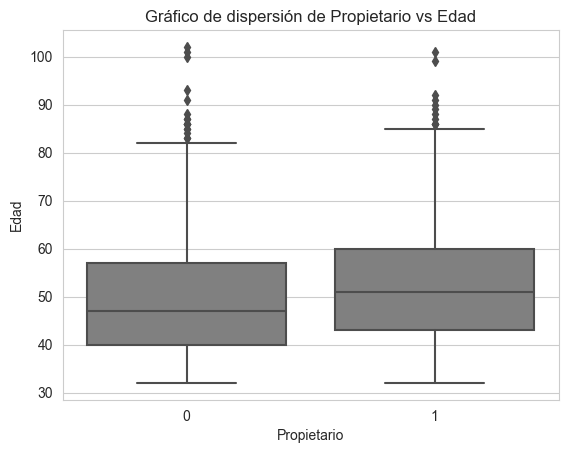

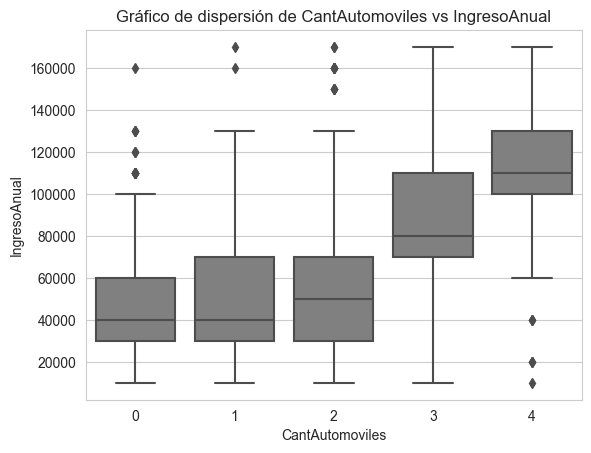

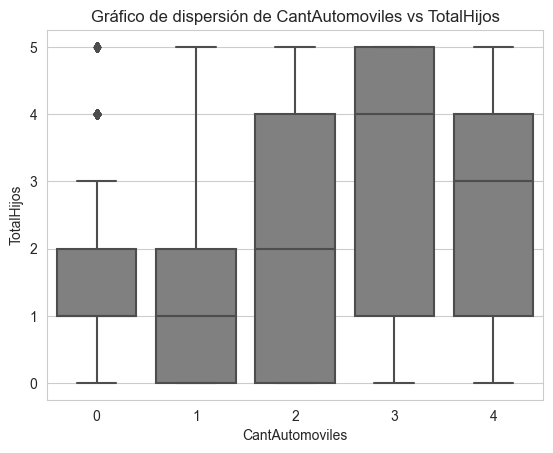

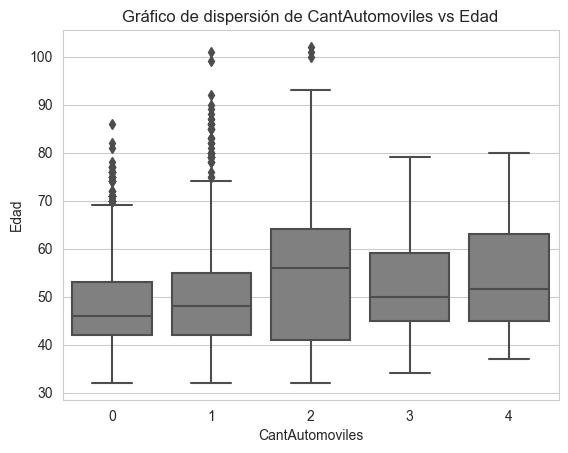

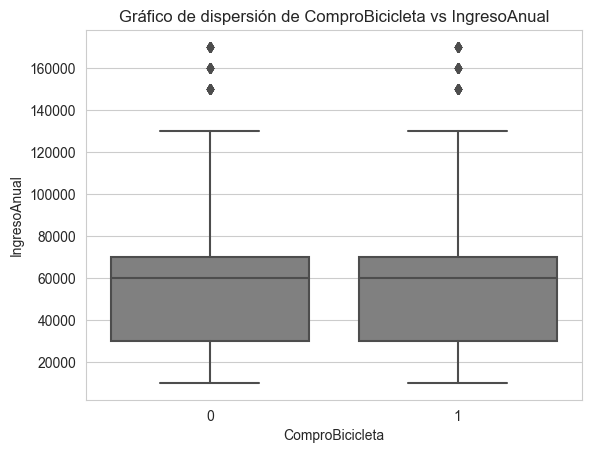

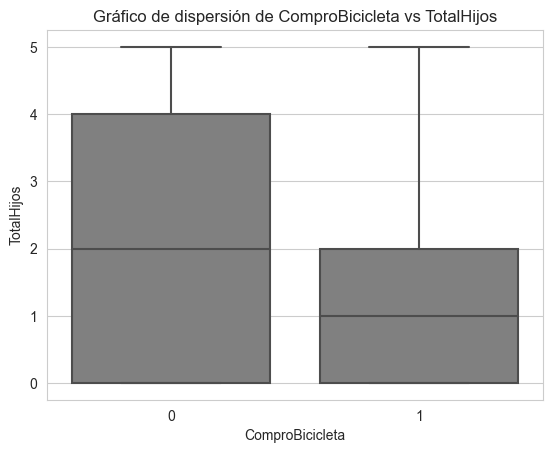

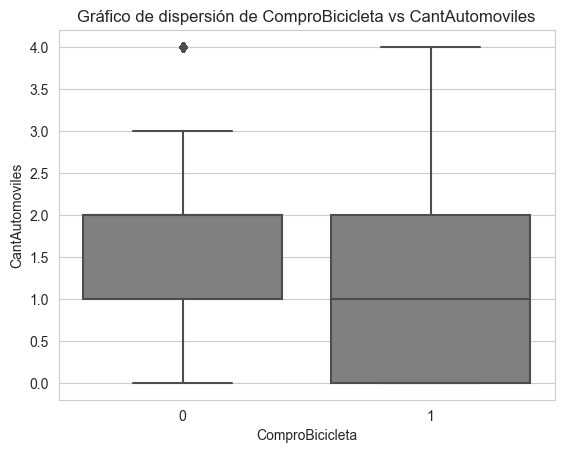

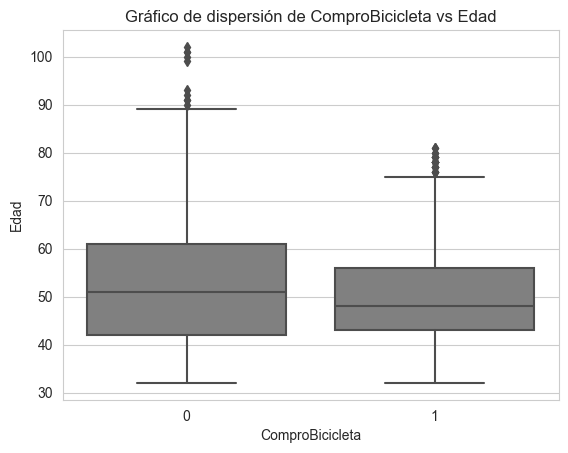

In [128]:
data_to_analyze = [["TotalHijos", "IngresoAnual"], ["TotalHijos", "Edad"], 
                   ["Propietario", "IngresoAnual"], ["Propietario", "CantAutomoviles"], ["Propietario", "Edad"], 
                   ["CantAutomoviles", "IngresoAnual"], ["CantAutomoviles", "TotalHijos"], ["CantAutomoviles", "Edad"], 
                   ["ComproBicicleta", "IngresoAnual"], ["ComproBicicleta", "TotalHijos"], ["ComproBicicleta", "CantAutomoviles"], ["ComproBicicleta", "Edad"]]

for data in data_to_analyze:
    sns.set_palette("Paired")
    # Gráfico de cajas y bigotes (boxplot)
    sns.boxplot(data=data_filt, x=data[0], y=data[1], color="grey")
    # Agregar título al gráfico
    plt.title("Gráfico de dispersión de " + data[0] + " vs " + data[1])
    # Mostrar el gráfico
    plt.show()

**TotalHijos - IngresoAnual**

Se aprecia que la mediana es igual para los que tienen un hijo o ninguno, aumenta para los que tienen TotalHijos igual a 2 o 3 y vuelve a aumentar para los que tienen 4 y 5 hijos.
Se presenta un rango considerablemente menor de ingresos anuales para los que tienen 5 hijos.
Para todas las cantidades de hijos existen valores de IngresoAnual por encima de la media, superiores a 160 mil.

**TotalHijos - Edad**

Siguiendo las edades que cubre la caja del boxplot podemos ver que van desplazándose hacia arriba desde 0 hasta 2 hijos.
Las medianas de edad también aumentan hasta los 2 hijos y de ahí en más se mantienen estables, incluso disminuyendo un poco en el caso de los 5 hijos.
No se ven valores atípicos para los que tienen 5 hijos, pero en el valor de TotalHijos = 1 encontramos gran cantidad de valores anómalos.
Quienes no tienen hijos presentan en su mayoría edades más jóvenes que los demás.	


**Propietario - IngresoAnual**

Podemos notar que para quienes son propietarios hay una mediana más alta con asimetría negativa, además la caja es más estrecha hacia arriba por lo que los ingresos anuales menores de los propietarios son más altos.

**Propietario - CantAutomoviles**

El 75% de los valores de los propietarios se encuentran entre 0 y 2, mientras que los no propietarios en su mayoría tienen 1 o 2  automóviles. 
Luego el intervalo de los propietarios llega hasta la cantidad máxima de automóviles que es 4, mientras que en los no propietarios hay unos pocos valores atípicos en CantAutomoviles = 4.

**Propietario - Edad**

No se aprecian diferencias significativas en la edad entre los que son propietarios y los que no. La mediana de los propietarios es un poco mayor (más de 50 años) que los que no (menos de 50 años) y es prácticamente simétrica.
Los cuartiles de los propietarios están entre 45 y 60, mientras que los no propietarios entre 40 y más de 55 aprox.


**CantAutomoviles - IngresoAnual**

Aquí la mediana de ingreso anual lógicamente es proporcional a la cantidad de automóviles que poseen. 
Aumenta a partir de los 2 automóviles y a partir de CantAutomoviles = 3 crece considerablemente.
Existen  varios valores atípicos, sin embargo los más llamativos se encuentran en los 4 automóviles ya que encontramos varios clientes con un ingreso anual considerablemente bajo (menor a 40 mil) que poseen 4 automóviles.
Lo cual resulta ilógico pensando en que quienes tienen mayor cantidad de autos tendrían que tener un ingreso anual alto pero debe considerarse cada caso cuando se revisen los outliers.

**CantAutomoviles - TotalHijos**

Podemos notar que la mediana va aumentando a medida que se aumenta la cantidad de automoviles. Eso quiere decir que se mantiene en la mayoria de los casos una relacion directa en la que a mayor cantidad de automoviles, mayormente se tiene más cantidad de hijos. Notamos que para la cantidad de 2 automoviles mantiene una distribuicion casi uniforme y el rango es tan amplio que abarca casi todo el dominio de la cantidad de hijos.  En el valor de CantAutomoviles = 1, notamos que el valor del tercer cuartil (75%) es de 2 y su cuadrado es corto por lo que es estrecho el rango, sin embargo existen 2 outliers. 

**CantAutomoviles - Edad**

Lo primero que podemos notar es que para cada valor de la cantidad de automoviles la mediana de la edad varía poco (45-55). Notamos que para las personas que cuentan con 0,1,2 automoviles normalmente tienen una edad dentro de un rango de 45 a 60 años pero no podemos obviar los multiples outliers existentes en estos 3 valores. En el valor de CantAutomoviles = 1, analizando su caja podemos ver que es practicamente uniforme, pero también observamos que es el valor para el cual se encuentran más valores anomalos. Para los valores de 3 a 4 automoviles no existen outliers.  


**ComproBicicleta - IngresoAnual**

En este caso notamos que ambos boxplots son exactamente iguales para ambos valores de la variable ComproBicicleta. Debido a esto y también como demostramos anteriormente en la matriz S, podemos decir que ambas variables no están relacionadas entre sí y que por ello, el comprar o no una bicicleta no depende del ingreso anual. 

**ComproBicicleta - TotalHijos**

Lo primero que notamos es que la media disminuye en el caso de los clientes que sí compraron bicicleta. Es decir, el 50% de los que compraron bicicleta tienen 1 hijo mientras que el 50% de los clientes que no compraron bicicleta tienen 2 hijos. Fijándonos en el tamaño de las cajas determinamos que es más amplio el rango de aquellos clientes que no compraron bicicleta que los que sí lo hicieron. Como un preanalisis predictivo podriamos decir que aquellos clientes que tengan 4 o 5 hijos lo más probable es que no nos compren una bicicleta. 

**ComproBicicleta - CantAutomoviles**

Lo importante a analizar en este boxplot estratificado es que el rango de los clientes que necesitan o compran una bicicleta son aquellos que poseen de 0 a 2 automoviles. Este dato puede ser muy importante a la hora de decidir a quién enviarle un mail con las promociones aunque no es definitorio. 

**ComproBicicleta - Edad**

Notamos que ambas cajas son muy parecidas por lo que entendemos que ambas variables no están muy relacionadas. Podemos tener en cuenta que debido a que la caja del bloxplot de ComproBicicleta = 1 es más corta, entendemos que es debido a que los datos están más concentrados y su rango intercuartilico es más pequeño. En ambos casos notamos la presencia de outliers.  Concluimos que la decision de comprar o no una bicicleta no depende de la edad del cliente. 


### Diagramas de dispersión estratificados

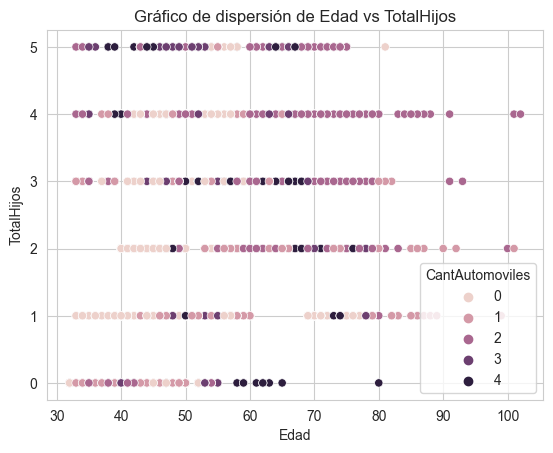

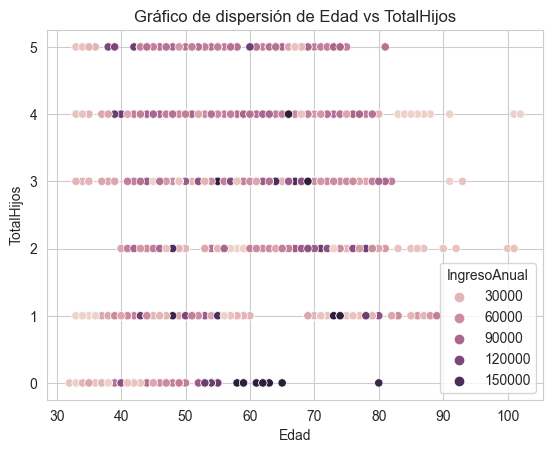

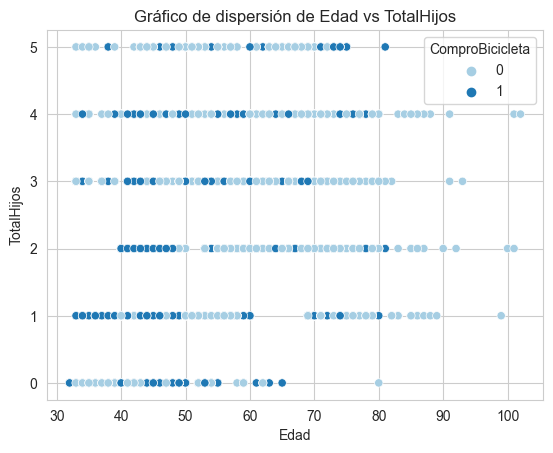

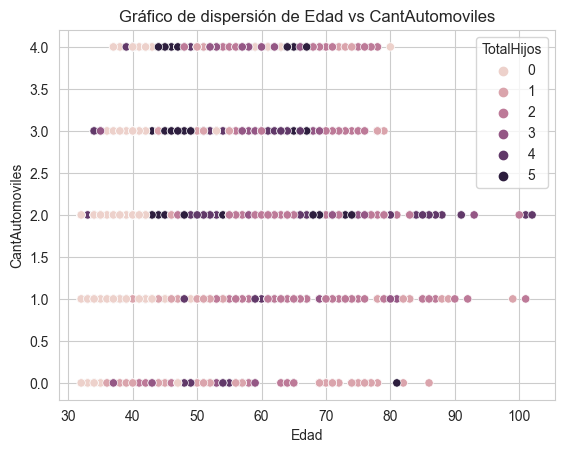

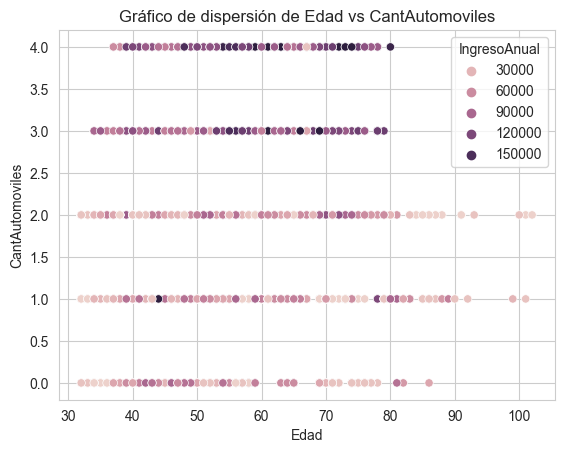

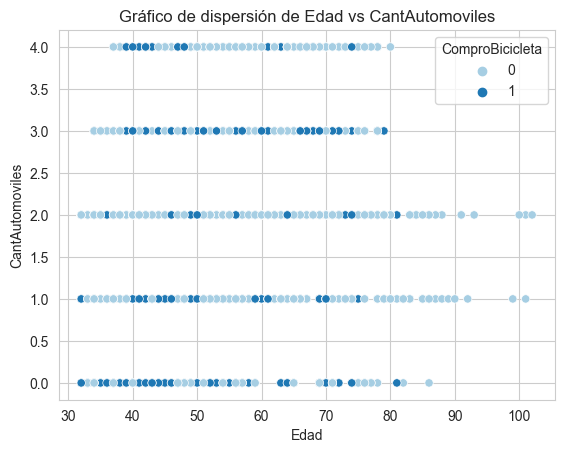

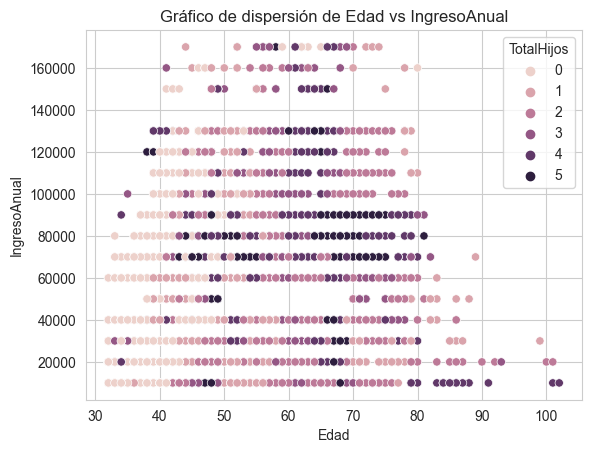

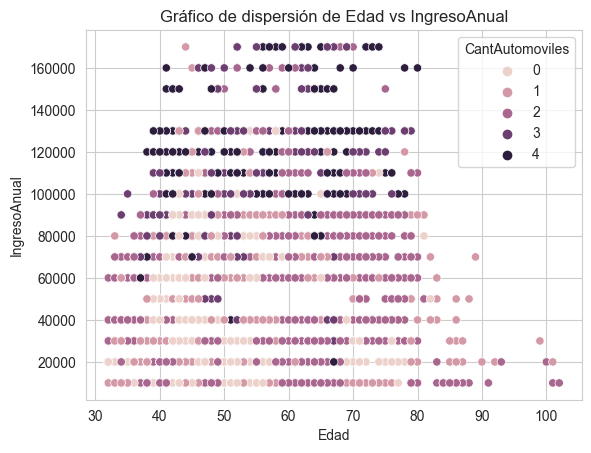

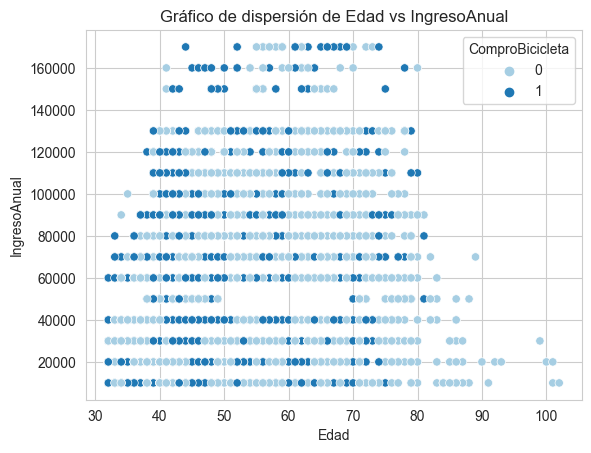

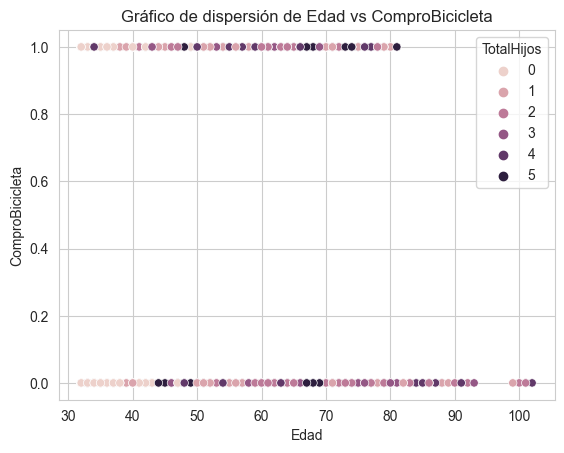

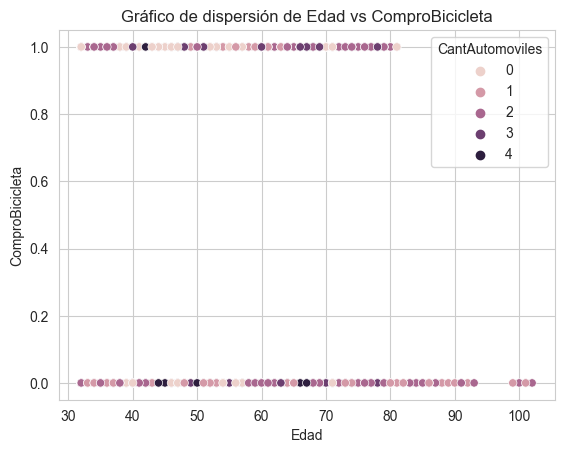

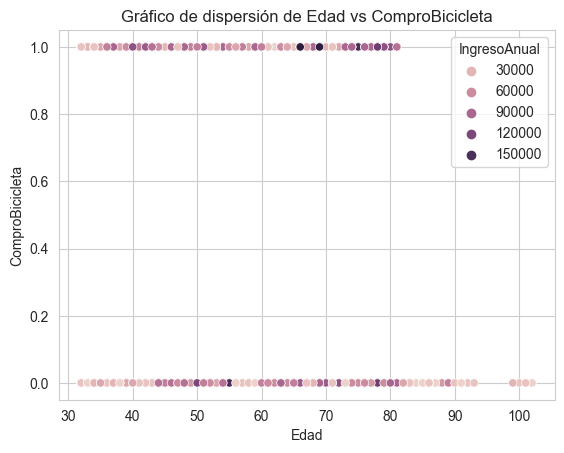

In [129]:
cols_to_analyze = ['Edad', 'TotalHijos', 'CantAutomoviles', 'IngresoAnual', 'ComproBicicleta']

for col in cols_to_analyze:
    for h in cols_to_analyze:
        if ((col != "Edad") & (h != col) & (h != "Edad")):
            # Crear el gráfico de dispersión
            sns.scatterplot(data=data_filt, x="Edad", y=col, hue=h, color="grey")
            
            # Agregar título al gráfico
            plt.title("Gráfico de dispersión de Edad vs " + col)
            # Mostrar el gráfico
            plt.show()

### Calidad de los datos
Completamos los datos faltantes de la variable IngresoAnual con la media de los valores de la variable.

In [130]:
filas_ingreso_null = data_filt["IngresoAnual"].isna()
data_filt[filas_ingreso_null]
data_filt.loc[filas_ingreso_null, "IngresoAnual"] = data_filt.IngresoAnual.median()

data_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype        
---  ------              --------------  -----        
 0   EstadoCivil         6400 non-null   object       
 1   Genero              6400 non-null   object       
 2   IngresoAnual        6400 non-null   float64      
 3   TotalHijos          6400 non-null   int64        
 4   Educacion           6400 non-null   object       
 5   Ocupacion           6400 non-null   object       
 6   Propietario         6400 non-null   int64        
 7   CantAutomoviles     6400 non-null   int64        
 8   FechaPrimeraCompra  6400 non-null   period[A-DEC]
 9   Distancia           6400 non-null   object       
 10  Region              6400 non-null   object       
 11  Edad                6400 non-null   int64        
 12  ComproBicicleta     6400 non-null   int64        
dtypes: float64(1), int64(5), object(6), period[A-DEC](1)
memory usa

Renombramos las columnas y exportamos el DataFrame con los datos completos a un nuevo archivo csv.

In [131]:
data_filt.to_csv('data/data_to_analize.csv', index=False)